<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/churn__prediction_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
churn = pd.read_csv("/content/Churn_Modelling (1).csv")
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
churn = churn.drop(["Surname", "RowNumber","CustomerId"], axis=1)

In [4]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
churn.isna().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
churn['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X=churn.drop('Exited', axis=1)
y= churn['Exited'].copy()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [11]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


cat_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder())
])

num_pipeline= Pipeline([(
    'imputer', SimpleImputer(strategy='median')
)])

transformer= ColumnTransformer([
    ('num',num_pipeline, num_features),
    ('cat',cat_pipeline, cat_features)
],remainder='passthrough')

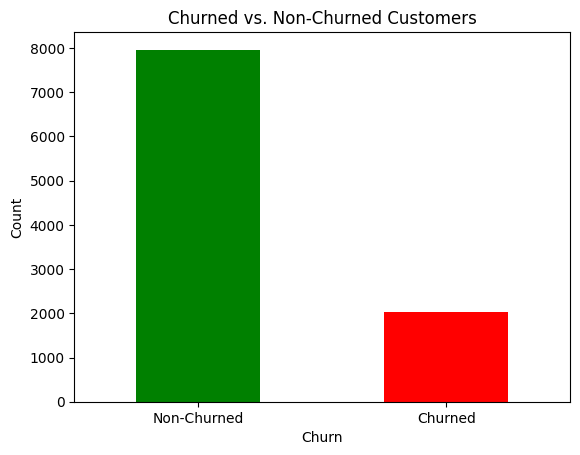

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a bar plot to show the distribution of churned vs. non-churned customers
churn['Exited'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Churned', 'Churned'], rotation=0)
plt.show()

In [18]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

column_names = transformer.get_feature_names_out()

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column_names)
X_train_transformed_df
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=column_names)

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(class_weight = {0:0.4, 1:0.6})
log.fit(X_train_transformed_df, y_train)

LogisticRegression(class_weight={0: 0.4, 1: 0.6})

In [24]:
log.score(X_train_transformed_df, y_train)

0.7815

In [25]:
log.score(X_test_transformed_df, y_test)

0.7925

In [26]:
from sklearn.metrics import f1_score,recall_score,precision_score
preds = log.predict(X_test_transformed_df)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
f1_score(preds, y_test)

0.2732049036777583

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_transformed_df, y_train)


X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)


log = LogisticRegression()
log.fit(X_train_res, y_train_res)


y_pred = log.predict(X_test_res)


accuracy = accuracy_score(y_test_res, y_pred)
print("Accuracy on resampled data: ", accuracy)

Accuracy on resampled data:  0.6936688950058986


In [30]:
f1_score(y_test_res, y_pred)*100

69.41499803690617